In [104]:
import pandas as pd
import numpy as np
import pmdarima as pm
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

df = pd.read_csv('..\\..\\Dataset\\testes\\dataset_casos_mensais_publicacao.csv', 
                    parse_dates=['dt_notificacao'],
                    usecols=['dt_notificacao', 'cd_municipio', 'qntd_casos', 'temp_media_mensal', 'precipitacao_total_mensal']
                )
df = df.sort_values('dt_notificacao')

df_sp = df[
         (df['cd_municipio'] == 355030) 
        & (df['dt_notificacao'] > '2018-03-01') 
        & (df['dt_notificacao'] <= '2023-12-01')
        ]

In [105]:
df_sp.set_index('dt_notificacao', inplace=True)

df_sp.fillna(method='ffill', inplace=True)

C:\Users\kenzo\AppData\Local\Temp\ipykernel_7608\1156336966.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sp.fillna(method='ffill', inplace=True)
C:\Users\kenzo\AppData\Local\Temp\ipykernel_7608\1156336966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp.fillna(method='ffill', inplace=True)


In [106]:
# Split the dataset into training and testing
train_size = int(len(df_sp) * 0.7)
train = df_sp.iloc[:train_size]
test = df_sp.iloc[train_size:]

In [ ]:
y_train = train['qntd_casos']
y_test = test['qntd_casos']
exog_train = train[['temp_media_mensal']]
exog_test = test[['temp_media_mensal']]

In [108]:
model = ARIMA(y_train, order=(2, 1, 2), exog=exog_train)
model_fit = model.fit()

# Fazer previsões
y_pred_test = model_fit.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, exog=exog_test)

C:\Users\kenzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kenzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kenzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kenzo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Local

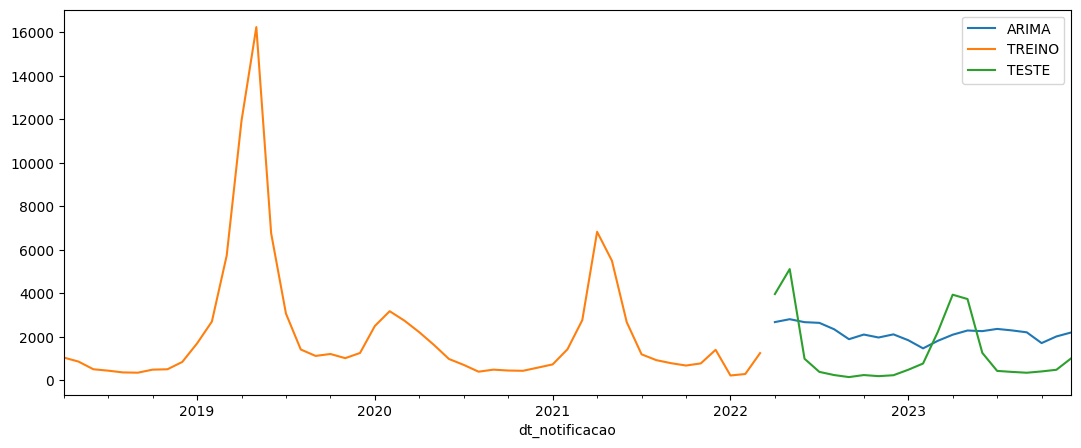

In [109]:

fig, ax = plt.subplots(figsize=(13, 5))

y_pred_test.plot(ax=ax, label='ARIMA')
y_train.plot(ax=ax, label='TREINO')
y_test.plot(ax=ax, label='TESTE')

ax.legend()

In [110]:
MSE = mean_squared_error(y_pred=y_pred_test, y_true=y_test)
RMSE = root_mean_squared_error(y_pred=y_pred_test, y_true=y_test)
MAE = mean_absolute_error(y_pred=y_pred_test, y_true=y_test)
MAPE = mean_absolute_percentage_error(y_pred=y_pred_test, y_true=y_test)
r2 = r2_score(y_pred=y_pred_test, y_true=y_test)
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")
print(f"MAE: {MAE}")
print(f"MAPE: {MAPE}")
print(f"r2: {r2}")

MSE: 2751011.249290264
RMSE: 1658.6172702857837
MAE: 1589.2571276095089
MAPE: 3.9827526419328234
r2: -0.2224599556294391


In [96]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score